In [3]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import glob
import os

In [60]:
d = {}  # dictionary that will hold them 
month_array = ['September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']

for month in month_array:  # loop over files

   # read csv into a dataframe and add it to dict with file_name as it key
   d[month] = pd.read_csv(r'C:\Users\hjh44\OneDrive - University of Bath\Masters Project\Python\Transient Detection\CSV_output_dataframes\\' + month)

In [61]:
sep = d['September']
oct = d['October']
nov = d['November']
dec = d['December']
jan = d['January']
feb = d['February']
mar = d['March']
apr = d['April']
may = d['May']
jun = d['June']

In [69]:
#Ignore June for now, is very wrong.. need to re save down csv 

,25.1188643150958,31.6227766016838,39.8107170553497,50.1187233627272,63.0957344480193,79.4328234724282,100,125.892541179417,158.489319246111,199.526231496888,...,7943.28234724283,10000,12589.2541179417,15848.9319246112,19952.6231496888,25118.8643150958,broadband_SPL,background,loud,transient
0,68.011590,71.421988,69.084892,63.095016,63.418423,77.032534,55.955781,58.972991,56.703690,55.903706,...,56.230369,56.915478,57.734529,58.605397,60.426755,57.103780,-42.136694,NaN,False,False
1,62.536545,74.892342,70.305653,61.905577,62.318829,76.118956,57.451835,59.028432,57.187662,55.098824,...,56.502152,57.110676,57.514592,58.493048,60.078192,57.177460,-41.932490,NaN,False,False
2,65.042143,74.557136,71.256169,62.676979,65.186810,77.506375,58.213586,58.352662,55.410898,55.369355,...,56.535696,57.075547,57.399437,58.624187,60.267675,57.178298,-41.187519,NaN,False,False
3,67.853887,72.110658,70.200235,64.644729,62.263610,76.893456,61.459811,58.655305,56.800964,56.037980,...,56.731290,56.999255,57.531700,58.531961,60.159401,57.243008,-41.940209,NaN,False,False
4,67.919579,72.588676,68.617284,62.261382,63.320277,78.386350,60.188036,59.109317,57.572912,58.169922,...,56.673573,57.123033,57.443650,58.559736,60.234479,57.277255,-41.227633,NaN,False,False


Text(0, 0.5, 'Average noise per frequency band')

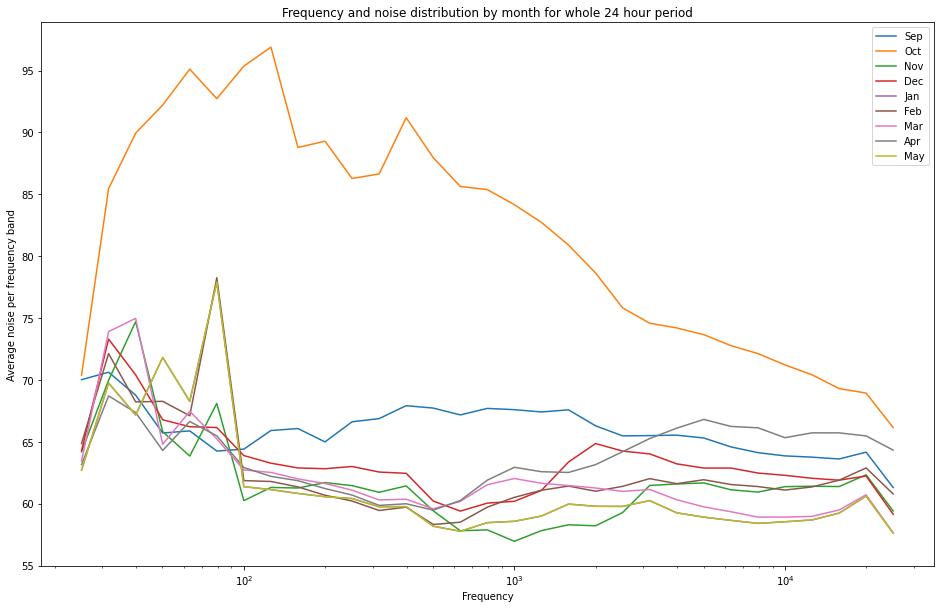

In [73]:
fig,ax = plt.subplots(figsize=(16,10))

#frequencies as floats
freq = sep.drop(['broadband_SPL', 'background', 'loud', 'transient'], axis=1).columns.to_numpy()
freq = freq.astype(np.float)

k = -1
for name in [sep, oct, nov, dec, jan, feb, mar, apr, may]:
    
    # k is random counter for labels on plot
    k = k+1   
    labels = ['Sep', 'Oct', 'Nov','Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']
    
    #average noise of each frequency band within a 'transient' event 
    freq_avgs = name.drop(['broadband_SPL', 'background', 'loud', 'transient'], axis=1).mean(axis=0)
    
    #create a dataframe to plot
    freq_dist = pd.DataFrame({'Freq':freq, 'Average Noise':freq_avgs})
    ax.plot(freq_dist['Freq'], freq_dist['Average Noise'], label=labels[k])
    ax.set_xscale('log')
    
plt.legend()

plt.title('Frequency and noise distribution by month for whole 24 hour period')
plt.xlabel('Frequency')
plt.ylabel('Average noise per frequency band')
#plt.xlim(0,3000)